In [1]:
import numpy as np
import scipy
import sympy
import sympy.abc
import matplotlib.pyplot as plt
sympy.init_printing()

In [2]:
x = sympy.abc.x
K = sympy.abc.K
C = sympy.abc.C

In [3]:
F = sympy.Lambda(x, sympy.cos(x))
F

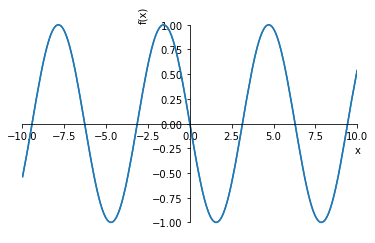

In [4]:
sympy.plot((F(x+1e-6)-F(x-1e-6))/(2*1e-6), F(x).diff(x))

In [5]:
F_plus = sympy.Lambda((x,C,K), x + ((F(x+C)-F(x-C))/(2*C))/K)
F_minus = sympy.Lambda((x,C,K), x - ((F(x+C)-F(x-C))/(2*C))/K)
F_plus, F_minus

In [6]:
lambda_F_plus = sympy.lambdify(x, F_plus(x,1e-6,10))
lambda_F_minus = sympy.lambdify(x, F_minus(x,1e-6,10))
a = b = 1.
for _ in range(1000):
    a = lambda_F_plus(a)
    b = lambda_F_minus(b)
a,b

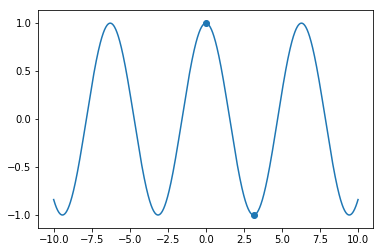

In [7]:
lambda_F = sympy.lambdify(x, F(x))
xs = np.linspace(-10,10,1000)
plt.plot(xs,lambda_F(xs))
plt.scatter(np.array([a,b]),lambda_F(np.array([a,b])))
plt.show()

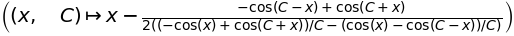

In [11]:
F_newton = sympy.Lambda((x,C), x - ((F(x+C)-F(x-C))/(2*C))/((((F(x+C)-F(x))/C)-((F(x)-F(x-C))/C))/C))
F_newton

In [16]:
lambda_F_newton = sympy.lambdify(x, F_newton(x,1e-6))
a = 3.
for _ in range(10):
    a = lambda_F_newton(a)
a